In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

In [ ]:
from google.colab import files
files.upload()

Saving Accidental_Drug_Related_Deaths_Cleaned.csv to Accidental_Drug_Related_Deaths_Cleaned.csv


{'Accidental_Drug_Related_Deaths_Cleaned.csv': b'Age,Cause of Death,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Xylazine,Gabapentin,Opiate NOS,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo,Residence_Lat,Residence_Lon,Death_Lat,Death_Lon,Injury_Lat,Injury_Lon,Opioid,Morphine,Sex_Female,Sex_Male,Race_Asian,Race_Black Or African American,Race_Other,Race_Unknown,Race_White,Manner of Death_Accident,Injury Place_Other,Injury Place_Other Specified Place,Injury Place_Residence,Description of Injury_Substance Abuse,Description of Injury_Substance Use,Location_Decedent\xe2\x80\x99s Home,Location_Hospital,Location_Hospital - ER/Outpatient,Location_Hospital - Inpatient,Location_Other,Location_Residence\r\n37.0,Heroin Toxicity,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,,41.524304,-72.075821,41.524304,-72.075821,41.524304,-72.075821,1,0,False,True,False,False,False,False,True,True,False,False,True,False,True,False,True,

In [ ]:
df=pd.read_csv('Accidental_Drug_Related_Deaths_Cleaned.csv')

# **TRY WITH LOCATION: INJURY**
# **K MEANS**

In [ ]:
X = np.stack((df['Injury_Lat'].to_numpy(), df['Injury_Lon'].to_numpy()), axis=1)
X_df = df[['Injury_Lat', 'Injury_Lon']]
categorical_features = ['Injury_Lat', 'Injury_Lon']

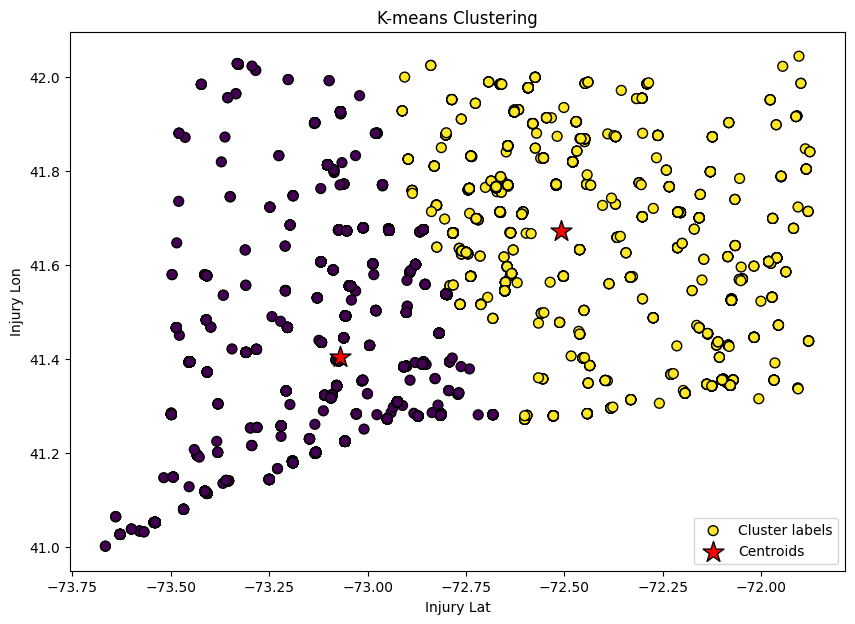

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Predict the cluster labels
kmeans_labels_ = kmeans.predict(X)

# Plot the results
# For visualization, we'll use the first two features (sepal length and sepal width)
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 1], X[:, 0], c=kmeans_labels_, cmap='viridis', marker='o', edgecolor='k', s=50, label='Cluster labels')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=250, marker='*', c='red', edgecolor='k', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Injury Lat')
plt.ylabel('Injury Lon')
plt.legend()
plt.show()

In [ ]:
# Silhouette Score (Higher better)
silhouette_avg = silhouette_score(X, kmeans_labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Index (Lower better)
davies_bouldin_idx = davies_bouldin_score(X, kmeans_labels_)
print(f"Davies-Bouldin Index: {davies_bouldin_idx:.3f}")

# Calinski-Harabasz Index (Higher better)
calinski_harabasz_idx = calinski_harabasz_score(X, kmeans_labels_)
print(f"Calinski-Harabasz Index: {calinski_harabasz_idx:.3f}")

Silhouette Score: 0.467
Davies-Bouldin Index: 0.854
Calinski-Harabasz Index: 9952.836


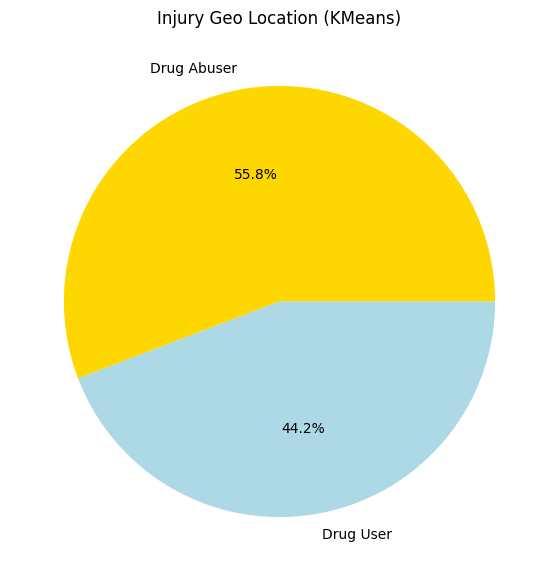

In [ ]:
# Define cluster names
cluster_names = {0: 'Drug Abuser', 1: 'Drug User'}

# Count occurrences of each cluster label
unique, counts = np.unique(kmeans_labels_, return_counts=True)

# Map cluster labels to names
labels = [cluster_names[label] for label in unique]

# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['gold', 'lightblue'])
plt.title('Injury Geo Location (KMeans)')
plt.show()

# **KMODES**

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

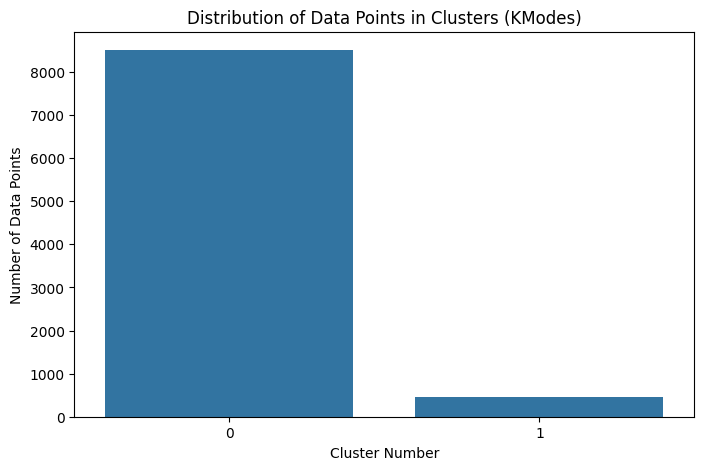

<ipython-input-20-38a0c612f3f2>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['Cluster'] = kmode_labels_  # Add cluster labels to dataset



Cluster 0 Characteristics:
Injury_Lat    41.765775
Injury_Lon   -72.673356
Cluster        0.000000
Name: 0, dtype: float64

Cluster 1 Characteristics:
Injury_Lat    41.554261
Injury_Lon   -73.043069
Cluster        1.000000
Name: 0, dtype: float64


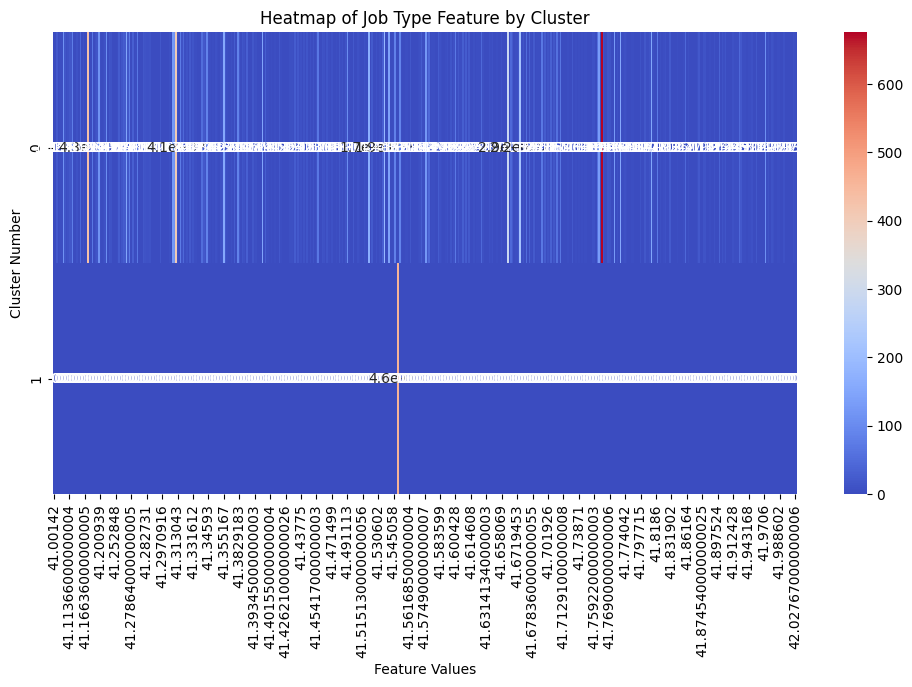

In [ ]:
# Step 9: Perform final KModes clustering with the best K (chosen as 6)
best_k = 2
kmode = KModes(n_clusters=best_k, random_state=42)
kmode_labels_ = kmode.fit(X_df).labels_

# Step 10: Print cluster centroids for interpretation
# for c in kmode.cluster_centroids_:
#     print(c)

# Step 11: Print final cluster labels
# print("Cluster labels:", labels)

# Step 12: Plot Cluster Distribution
# Helps check for imbalanced clusters
plt.figure(figsize=(8, 5))
sns.countplot(x=kmode_labels_)
plt.xlabel('Cluster Number')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points in Clusters (KModes)')
plt.show()

# Step 13: Analyze the Most Common Features in Each Cluster
X_df['Cluster'] = kmode_labels_  # Add cluster labels to dataset

for cluster in range(best_k):
    print(f"\nCluster {cluster} Characteristics:")
    print(X_df[X_df['Cluster'] == cluster].mode().iloc[0])  # Show the most common values per cluster

# Step 14 (Optional): Plot Pairplot for Categorical Data
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(X_df['Cluster'], X_df[categorical_features].iloc[:, 0]), cmap="coolwarm", annot=True)
plt.title("Heatmap of Job Type Feature by Cluster")
plt.xlabel("Feature Values")
plt.ylabel("Cluster Number")
plt.show()

In [ ]:
# Silhouette Score (Higher better)
silhouette_avg = silhouette_score(X, kmode_labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Index (Lower better)
davies_bouldin_idx = davies_bouldin_score(X, kmode_labels_)
print(f"Davies-Bouldin Index: {davies_bouldin_idx:.3f}")

# Calinski-Harabasz Index (Higher better)
calinski_harabasz_idx = calinski_harabasz_score(X, kmode_labels_)
print(f"Calinski-Harabasz Index: {calinski_harabasz_idx:.3f}")

Silhouette Score: -0.162
Davies-Bouldin Index: 1.598
Calinski-Harabasz Index: 135.762


# **DB SCAN**

In [ ]:
dbscan = DBSCAN(eps=0.04, min_samples=5)
dbscan_labels_ = dbscan.fit_predict(X)

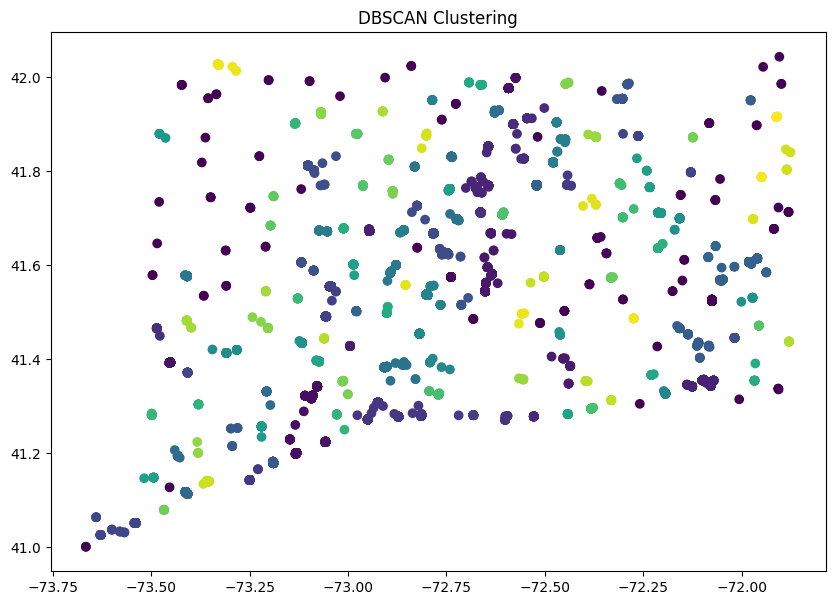

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 1], X[:, 0], c=dbscan_labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
# Silhouette Score (Higher better -1 to 1)
silhouette_avg = silhouette_score(X, dbscan_labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Index (Lower better)
davies_bouldin_idx = davies_bouldin_score(X, dbscan_labels_)
print(f"Davies-Bouldin Index: {davies_bouldin_idx:.3f}")

# Calinski-Harabasz Index (Higher better)
calinski_harabasz_idx = calinski_harabasz_score(X, dbscan_labels_)
print(f"Calinski-Harabasz Index: {calinski_harabasz_idx:.3f}")

Silhouette Score: 0.765
Davies-Bouldin Index: 2.339
Calinski-Harabasz Index: 2433.803
